# Statistical Study on Growth of Jehovah's Witnesses
This is a project to find insights on the growth of Jehovah's Witnesses since 1991 using Python Data Science Libraries (pandas, numpy, matplotlib, & sk-learn). I also applied a Multiple Linear Regression machine learning model to make predictions.

## Background

I will study the growth of the religious organization through a few variables:

* **Peak Publishers**: “Publishers” includes baptized Witnesses of Jehovah as well as unbaptized ones who qualify to be Kingdom preachers. “Peak publishers” is the highest number reporting for any one month of the service year.
* **Average Publishers**: "Average publishers” is the typical number of different ones reporting time in the ministry each month.
* **Total Hours Spent in Field**: The total number of hours spent preaching in the minstry worldwide.
* **Total Number Baptized**: The number of people that were baptized in that year. Usually, when a person is baptized, this means they officially join the organization.
* **Memorial Partakers**: The number of baptized individuals who partake of the emblems at the Memorial worldwide.
* **Worldwide Memorial Attendance**: The number of people that attend the Memorial.
* **Total Congregations**: The number of congregations (worship groups) worldwide.
* **Average Bible Studies Each Month**: The typical number of different Bible studies taking place each month.

## Import and View Data

We will start by importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

Next I will import data from a table I created with [Watchtower Online Library](https://wol.jw.org/en/wol/d/r1/lp-e/1200275209) :

In [2]:
df = pd.read_csv("./data.csv")
df.head()

,Year,Total Congregations,Worldwide Memorial Attendance,Memorial Partakers Worldwide,Peak of Publishers,Average Publishers Preaching Each Month,Total Number Baptized,Total Hours Spent in Field,Average Bible Studies Each Month
0,1991,66207,10650158,8850,4278820,4071954,300945,951870021,3947261
1,1992,69558,11431171,8683,4472787,4289737,301002,1024910434,4278127
2,1993,73070,11865765,8693,4709889,4483900,296004,1057341972,4515587
3,1994,75573,12288917,8617,4914094,4695111,314818,1096065354,4701357
4,1995,78620,13147201,8645,5199895,4950344,338491,1150353444,4865060


## Exploratory Analysis

To explore our data, we will graph certain variables over time to observe growth.



### Peak Publishers, Average Publishers, and Average Bible Studies

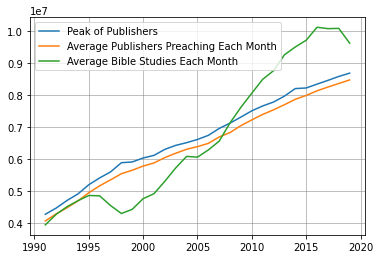

In [3]:
year = df["Year"]

plt.plot(year, df["Peak of Publishers"], label="Peak of Publishers")
plt.plot(year, df["Average Publishers Preaching Each Month"], label="Average Publishers Preaching Each Month")
plt.plot(year, df["Average Bible Studies Each Month"], label="Average Bible Studies Each Month")
plt.grid(color="Gray", linestyle="-", linewidth=0.5)
plt.legend()
plt.show()

Jehovah's Witnesses have had a nice growth of publishers over the last 28 years. Average Bible Studies have fluctuated more significantly, hitting an all time low in 1997 and an all time high in 2016.

### Total Congregations, Memorial Attendance, and Total Hours Spent in the Field

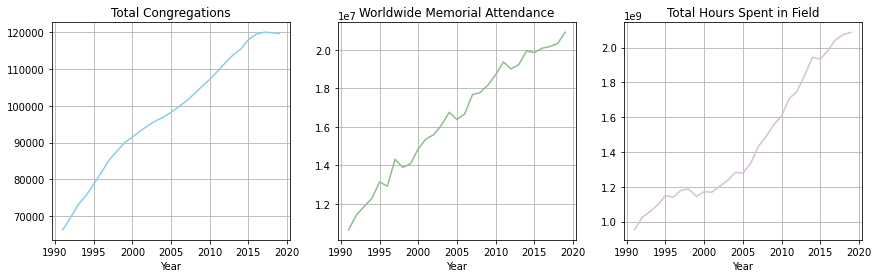

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.subplots_adjust(right=2)
df.plot(x="Year", y="Total Congregations", title="Total Congregations", ax=axes[0], grid=True, legend=False, color='skyblue')
df.plot(x="Year", y="Worldwide Memorial Attendance", title="Worldwide Memorial Attendance", ax=axes[1], grid=True, legend=False, color='darkseagreen')
df.plot(x="Year", y="Total Hours Spent in Field", title="Total Hours Spent in Field", ax=axes[2], grid=True, legend=False, color='thistle')
plt.show()

There has been tremendous growth in all three variables. While the number of congregations has started to plateau, both Memorial Attendance and Total Hours hit thier peaks in 2019.

### Memorial Partakers

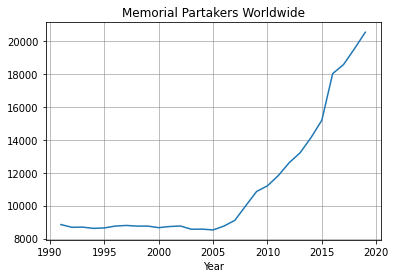

In [5]:
plt.plot(year, df["Memorial Partakers Worldwide"], label="Memorial Partakers Worldwide")
plt.title("Memorial Partakers Worldwide")
plt.xlabel("Year")
plt.grid(color="Gray", linestyle="-", linewidth=0.5)

Wow! The number of memorial partakers each year remained relatively flat until 2005. After that it exploded! It went from 8,524 in 2005 to 20,526 in 2019. That is a 141% increase!

### Total Number Baptized

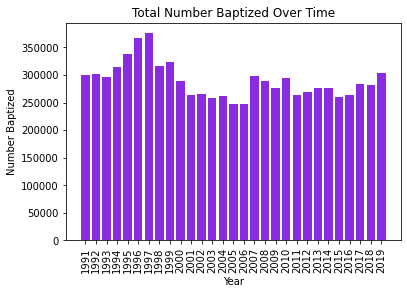

In [6]:
index = np.arange(len(year))
bap = df["Total Number Baptized"]
plt.bar(index,bap,color="BlueViolet")
plt.xlabel("Year")
plt.ylabel("Number Baptized")
plt.xticks(index,year,rotation="vertical")
plt.title("Total Number Baptized Over Time")
plt.show()

This plot has a bit of fluctuation. In the 1990s, a high number of people were getting baptized. However, the number steadily dropped in the 2000s. Ever since 2015, the number has started to rise again. The most people the were ever baptized was in 1997.

## Multiple Linear Regression

For our linear regression model, we will predict the Peak of Publishers with the rest of the columns in our dataframe. 

Let's start by the examining the correlations between our variables and the Peak of Publishers column:

In [7]:
df.corr()

,Year,Total Congregations,Worldwide Memorial Attendance,Memorial Partakers Worldwide,Peak of Publishers,Average Publishers Preaching Each Month,Total Number Baptized,Total Hours Spent in Field,Average Bible Studies Each Month
Year,1.000000,0.990791,0.990214,0.834687,0.996050,0.997468,-0.495717,0.964361,0.964233
Total Congregations,0.990791,1.000000,0.991559,0.786101,0.997272,0.996918,-0.495738,0.939586,0.937706
Worldwide Memorial Attendance,0.990214,0.991559,1.000000,0.769881,0.993007,0.992730,-0.501126,0.937542,0.942268
Memorial Partakers Worldwide,0.834687,0.786101,0.769881,1.000000,0.812087,0.820400,-0.208212,0.921657,0.880280
Peak of Publishers,0.996050,0.997272,0.993007,0.812087,1.000000,0.999624,-0.472351,0.956578,0.952028
Average Publishers Preaching Each Month,0.997468,0.996918,0.992730,0.820400,0.999624,1.000000,-0.476570,0.958964,0.955286
Total Number Baptized,-0.495717,-0.495738,-0.501126,-0.208212,-0.472351,-0.476570,1.000000,-0.357498,-0.440054
Total Hours Spent in Field,0.964361,0.939586,0.937542,0.921657,0.956578,0.958964,-0.357498,1.000000,0.987267
Average Bible Studies Each Month,0.964233,0.937706,0.942268,0.880280,0.952028,0.955286,-0.440054,0.987267,1.000000


Our all of our variables correlate fairly well with Peak of Publishers (except Total Number Baptized).

### Select and Split Data

In [8]:
#defining our independent and dependent variables
features = df[['Year','Total Congregations','Worldwide Memorial Attendance','Memorial Partakers Worldwide','Average Publishers Preaching Each Month','Total Number Baptized','Total Hours Spent in Field','Average Bible Studies Each Month']]
peak = df["Peak of Publishers"]

#Split Data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, peak, test_size = 0.2)

### Create and Fit the Model


In [9]:
model = LinearRegression().fit(x_train,y_train)

### Evaluate Model 

To begin our evaluation of the model, we will look at the r^2 scores for both the training and testing data:

In [10]:
model.score(x_train,y_train)

0.9997783597431962

In [11]:
model.score(x_test,y_test)

0.9997725098795058

Wow! We have r^2 scores of nearly 100% for both our training and testing sets! We can make some solid predictions with this model.

Now let's use the .coef_ attribute to see which features had the biggest influence on our dependent variable (Peak of Publishers):

In [12]:
sorted(list(zip(features,model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('Year', -9370.898997585362),
 ('Memorial Partakers Worldwide', -32.723144270102175),
 ('Total Congregations', -7.931434577715768),
 ('Average Publishers Preaching Each Month', 1.2284885517820676),
 ('Total Number Baptized', -0.11328461152465875),
 ('Average Bible Studies Each Month', -0.06376351850588984),
 ('Worldwide Memorial Attendance', -0.03621087621589042),
 ('Total Hours Spent in Field', 0.0007317017088990241)]

Lastly, we will plot our predicted y-values against our actual y-values. A perfect linear model would be the y=x line:

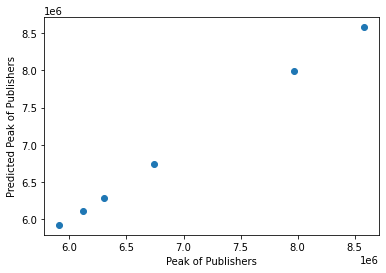

In [13]:
y_predicted = model.predict(x_test)

plt.scatter(y_test,y_predicted)
plt.xlabel('Peak of Publishers')
plt.ylabel('Predicted Peak of Publishers')

plt.savefig('/Users/kelvenopoku/Desktop/JW-Stats/plots/Predicted-Actual')
plt.show()

Pretty Good! Our points are very close to the y=x line.

## Conclusion

This was an informative and interesting problem where I got to apply a machine learning model to understand and evaluate my data.